Proyecto Final – MeIA 2025 Semana 1

In [45]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar los datos como DataFrame
iris = load_iris(as_frame=True)
df = iris.frame

# Renombrar columnas por claridad si lo deseas
df.columns = [col.lower().replace(" (cm)", "").replace(" ", "_") for col in df.columns]

# Extraer las variables necesarias
x = df[['sepal_width', 'petal_width', 'sepal_length']]  # Variables independientes
y = df['petal_length']  # Variable dependiente

In [46]:
print(df.head())
print(df.shape)


   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
(150, 5)


In [47]:
#Inicializamos los pesos y el sesgo
import numpy as np
W=np.array([1,1,1])
b=np.array([1])
N=df.shape[0] #Numero de registros, 150 en este caso


for epocas in range(500):

    #Calculamos las predicciones y'
    Predicciones=np.array([])
    for i in range(N):
        prediccion = np.sum(W * x.iloc[i].to_numpy()) + b
        Predicciones = np.append(Predicciones, prediccion)


    #Calculamos la funcion de costo MSE = f
    Dif=np.array([]) #La diferencia y'- y
    for j in range(N):
        diferencia = Predicciones[j] - (y.iloc[j])
        Dif = np.append(Dif, diferencia)
    Dif_square = Dif * Dif
    MSE = (1/(2*N))*np.sum(Dif_square)
    print('Funcion de costo MSE:', MSE)

    #Calculamos las derivadas parciales df/db, df/dwj
    df_db = (1 / N) * np.sum(Dif) #Para el sesgo

    df_dw = np.array([0.0, 0.0, 0.0]) #Para los pesos
    for i in range(N):
        xi = x.iloc[i].to_numpy()
        df_dw = df_dw + Dif[i] * xi
    df_dw = (1 / N) * df_dw


    #Actualizamos los parametros
    lr=0.01 #El valor sugerido en el pdf no logró converger
    W = W - lr*df_dw
    b = b - lr*df_db



Funcion de costo MSE: 27.34823333333334
Funcion de costo MSE: 8.35087445397199
Funcion de costo MSE: 2.9272137320147893
Funcion de costo MSE: 1.3739109470014086
Funcion de costo MSE: 0.9242555334463434
Funcion de costo MSE: 0.7893752001529221
Funcion de costo MSE: 0.7443378575599089
Funcion de costo MSE: 0.7250074627982432
Funcion de costo MSE: 0.7130956984164013
Funcion de costo MSE: 0.7033868063030864
Funcion de costo MSE: 0.6943924183235798
Funcion de costo MSE: 0.6856869719338736
Funcion de costo MSE: 0.677147958144681
Funcion de costo MSE: 0.6687392935244247
Funcion de costo MSE: 0.6604495529309773
Funcion de costo MSE: 0.6522743576199879
Funcion de costo MSE: 0.6442113533598868
Funcion de costo MSE: 0.6362587783330539
Funcion de costo MSE: 0.628415054594088
Funcion de costo MSE: 0.6206786713773185
Funcion de costo MSE: 0.6130481516219888
Funcion de costo MSE: 0.6055220422280297
Funcion de costo MSE: 0.598098911080866
Funcion de costo MSE: 0.5907773460089718
Funcion de costo MSE: 

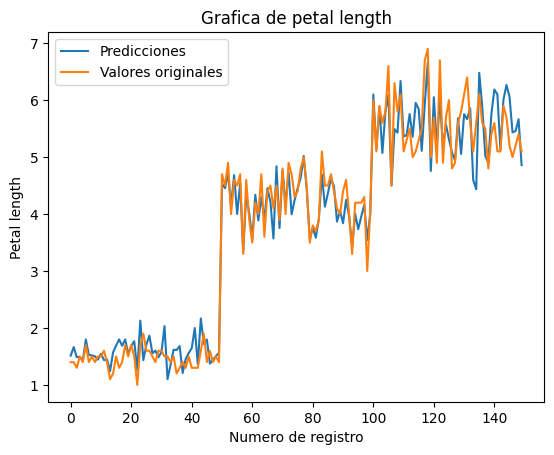

In [48]:
#Graficamos la linea ajustada
import matplotlib.pyplot as plt

Predicciones=np.array([])
for i in range(N):
    prediccion = np.sum(W * x.iloc[i].to_numpy()) + b
    Predicciones = np.append(Predicciones, prediccion)



plt.plot(Predicciones, label='Predicciones')
plt.plot(y, label='Valores originales')
plt.legend()
plt.title('Grafica de petal length')
plt.xlabel('Numero de registro')
plt.ylabel('Petal length')
plt.show()

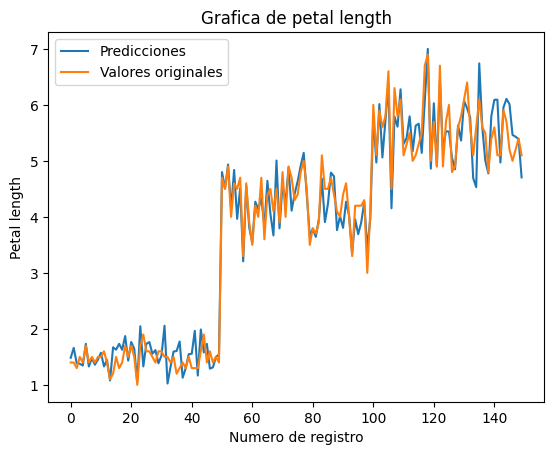

In [49]:
#Ahora vemos como lo hace scikit-learn
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo
modelo = LinearRegression() #Esto hace automaticamente todo lo anterior
modelo.fit(x, y) #Le indicamos los datos que tenemos

# Hacer predicciones
predicciones2 = modelo.predict(x)

#Graficamos
plt.plot(predicciones2, label='Predicciones')
plt.plot(y, label='Valores originales')
plt.legend()
plt.title('Grafica de petal length')
plt.xlabel('Numero de registro')
plt.ylabel('Petal length')
plt.show()

Vemos que, al menos a ojo, que ambas graficas son bastante parecidas. Probablemente el metodo LinearRegression hace algo bastante parecido a lo que hice con Numpy a mano.